# Abstract

The goal of this lab is to:
- Approximate the distribution using grid
- Use the inverse transform method to sample from the approximated distribution
- Sample from the approximated distribution
- Re-approximate the distribution from samples, using Monte-Carlo

# Import libraries

In [103]:
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

# Define the distribution

Define the distribution, let's use the Standard Normal

Text(0.5, 1.0, 'PDF of Normal(0, 1)')

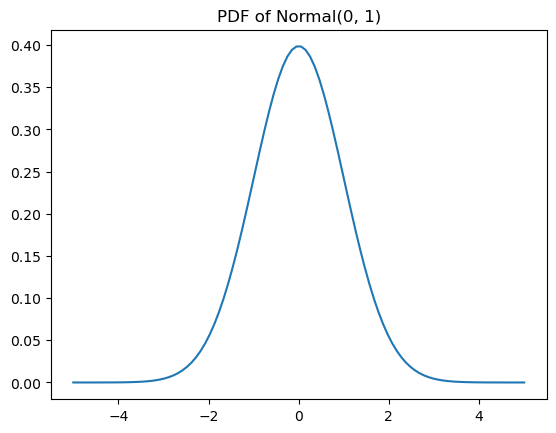

In [104]:
def gaussian(x, mu, sigma):
    denominator = sigma*math.sqrt(2*math.pi)
    epower = -0.5*math.pow((x - mu)/sigma, 2)
    return 1/denominator * math.pow(math.e, epower)

mu = 0
sigma = 1

x_axis = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax.plot(x_axis, [gaussian(x, mu, sigma) for x in x_axis])
plt.title(f'PDF of Normal({mu}, {sigma})', fontsize=12)

# Grid-approximated PDF

Approximate the distribution, using the grid approach

Text(0.5, 1.0, 'Grid approximation of PDF Normal(0, 1)')

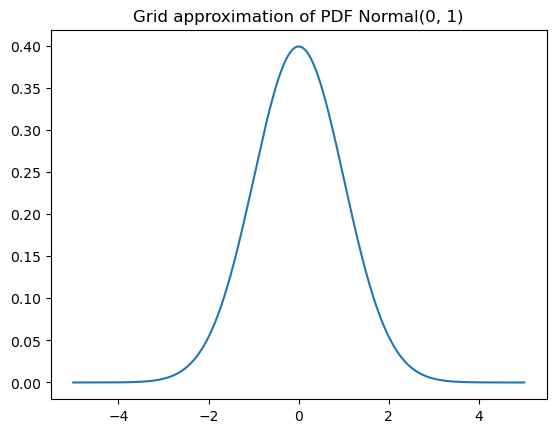

In [105]:
min = -5
max = 5
grid_resolution = 1000
grid_x = np.linspace(min, max, grid_resolution)
grid_approx = np.array([gaussian(x, mu, sigma) for x in grid_x])

fig, ax = plt.subplots()
ax.plot(grid_x, grid_approx)
plt.title(f'Grid approximation of PDF Normal({mu}, {sigma})', fontsize=12)

# Grid-approximated CDF

Text(0.5, 1.0, 'Grid approximation CDF of Normal(0, 1)')

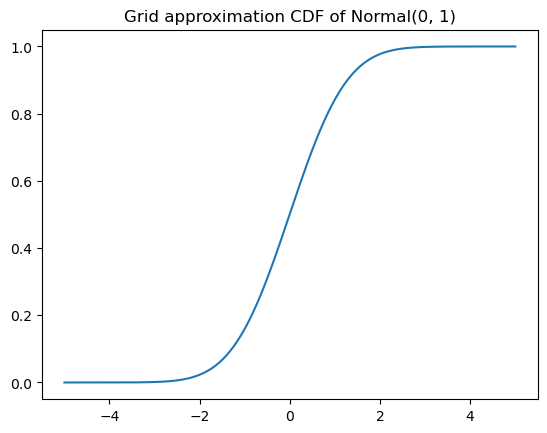

In [106]:
cdf = grid_approx.cumsum() / grid_approx.sum()
fig, ax = plt.subplots()
ax.plot(grid_x, cdf)
plt.title(f'Grid approximation CDF of Normal({mu}, {sigma})', fontsize=12)

# Grid-approximated inverse CDF

Find the inverse, to be able to sample from the distribution

Text(0.5, 1.0, 'Grid approximation of Inverse of CDF of Normal(0, 1)')

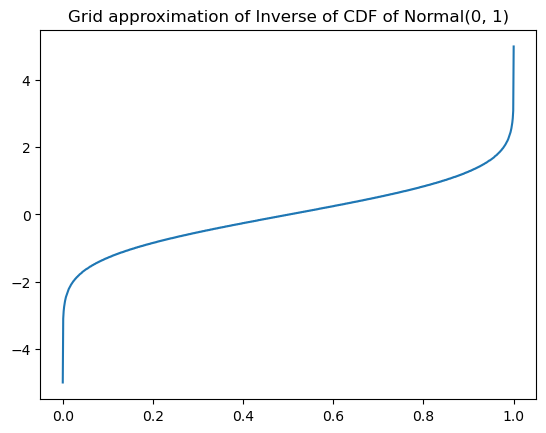

In [107]:
inverse_resolution = 1000

inverse_grid_x = np.linspace(0, 1, inverse_resolution)
inverse_grid_approx = np.array([grid_x[np.argmin(abs(x - cdf))] for x in inverse_grid_x])

fig, ax = plt.subplots()
ax.plot(inverse_grid_x, inverse_grid_approx)
plt.title(f'Grid approximation of Inverse of CDF of Normal({mu}, {sigma})', fontsize=12)

# Sample from the grid-approximated distribution

In [108]:
sample_size = 10
n_samples = 100

samples = np.array([inverse_grid_approx[np.random.randint(0, inverse_resolution, sample_size)] for s in range(0, n_samples)])

Visualize samples

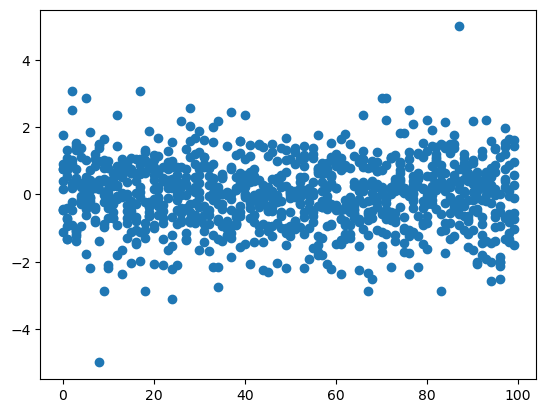

In [109]:
sample_dots = np.array([[x, y] for x in range(0, n_samples) for y in samples[x]])
plt.scatter(sample_dots[:, 0], sample_dots[:, 1])
plt.show()

# Monte-carlo-approximated PDF

Re-build the distribution from samples

In [110]:
epsilon = 0.5
distr = [(abs(samples - x) < epsilon).sum() / (sample_size*n_samples) for x in grid_x]

Visualize the re-build distribution

Text(0.5, 1.0, 'PDF Normal(0, 1) reconstructed from samples')

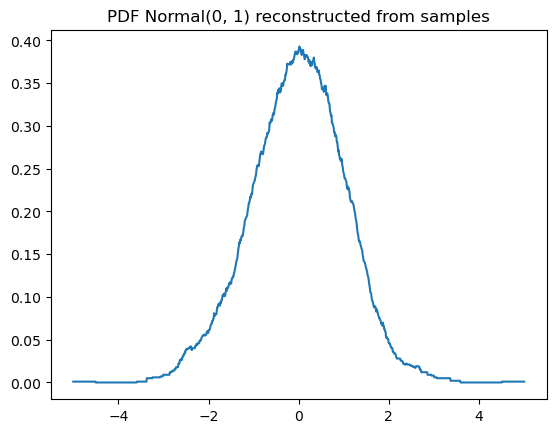

In [111]:
fig, ax = plt.subplots()
ax.plot(grid_x, distr)
plt.title(f'PDF Normal({mu}, {sigma}) reconstructed from samples', fontsize=12)